In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dill as pickle
import os
import scipy.interpolate as intp
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
%matplotlib inline

# from attractor_profile import attractor_profile
from symmetric_attractor_profile import attractor_profile
from holes_analysis import holes_data, holes_analysis
import bead_util as bu

In [29]:
fname = 'sim_data/N=7_hr=12.5_from_edge=2.5/attractor_profile.p'
with open(fname, 'rb') as f:
    attractor = pickle.load(f)

In [30]:
Fg = attractor.sector_newtonian((1020., 0., 5.))
Fg

array([ 0.,  0.,  0.])

In [37]:
list(attractor.data.keys())[-1]

0.00099950025000000004

In [39]:
attractor.data[0.00099950025000000004]['data']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [2]:
parent = os.getcwd()

full_path = '/sim_data/full_attractor_data/'
sym_path = '/sim_data/'

full_data = holes_data(full_path).data
sym_data = holes_data(sym_path).data

In [3]:
full_trial = full_data[7][2.5][12.5][20.0][5.0]
full_phis = full_data[7][2.5][12.5][20.0]['phis']
full_yukas = full_trial['yukawa']
full_newt = full_trial['newtonian']
full_yuka_funcs = full_trial['yuka_funcs']
full_newt_funcs = full_trial['newt_funcs']

sym_trial = sym_data[7][2.5][12.5][20.0][5.0]
sym_phis = sym_data[7][2.5][12.5][20.0]['phis']
lams = sym_trial['lambdas']
sym_yukas = sym_trial['yukawa']
sym_newt = sym_trial['newtonian']
sym_yuka_funcs = sym_trial['yuka_funcs']
sym_newt_funcs = sym_trial['newt_funcs']

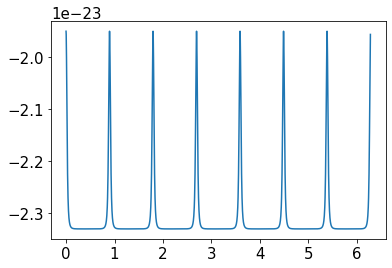

In [10]:
%matplotlib inline
plt.plot(sym_phis, sym_yukas[:,2, 0])

(0.0, 1.0)

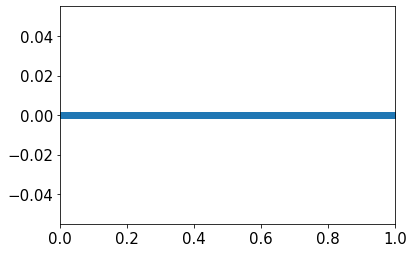

In [12]:
plt.plot(sym_phis, sym_newt[:,0], 'o')
plt.xlim(0,1)

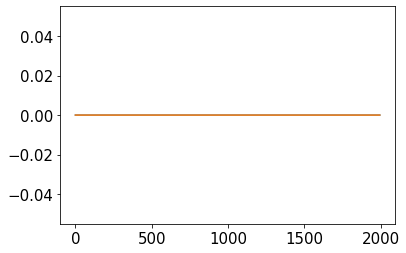

In [13]:
plt.plot(sym_yukas[:,0,2])
plt.plot(sym_yukas[:,1,2])

In [79]:
test_phis = np.linspace(0, np.pi/2, 500)
sym_newts = sym_newt_funcs(test_phis)
full_newts = full_newt_funcs(test_phis)

sym_yuka = sym_yuka_funcs[1](test_phis)
full_yuka = full_yuka_funcs[1](test_phis)

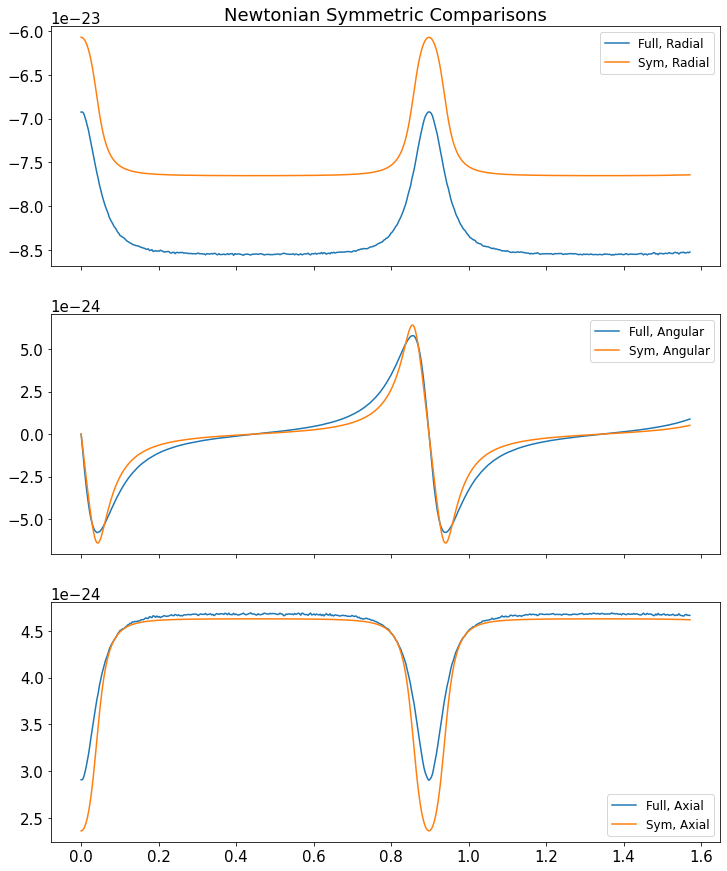

In [75]:
fig, ax = plt.subplots(3, figsize=(12,15), sharex=True)

ax[0].plot(test_phis, full_newts[0], label='Full, Radial')
ax[0].plot(test_phis, sym_newts[0], label='Sym, Radial')
ax[0].legend(fontsize=12)
ax[0].set_title('Newtonian Symmetric Comparisons', fontsize=18)

ax[1].plot(test_phis, full_newts[1], label='Full, Angular')
ax[1].plot(test_phis, sym_newts[1], label='Sym, Angular')
ax[1].legend(fontsize=12)

ax[2].plot(test_phis, full_newts[2], label='Full, Axial')
ax[2].plot(test_phis, sym_newts[2], label='Sym, Axial')
ax[2].legend(fontsize=12)

# plt.savefig('newt_sym_comparisons.png', dpi=150)

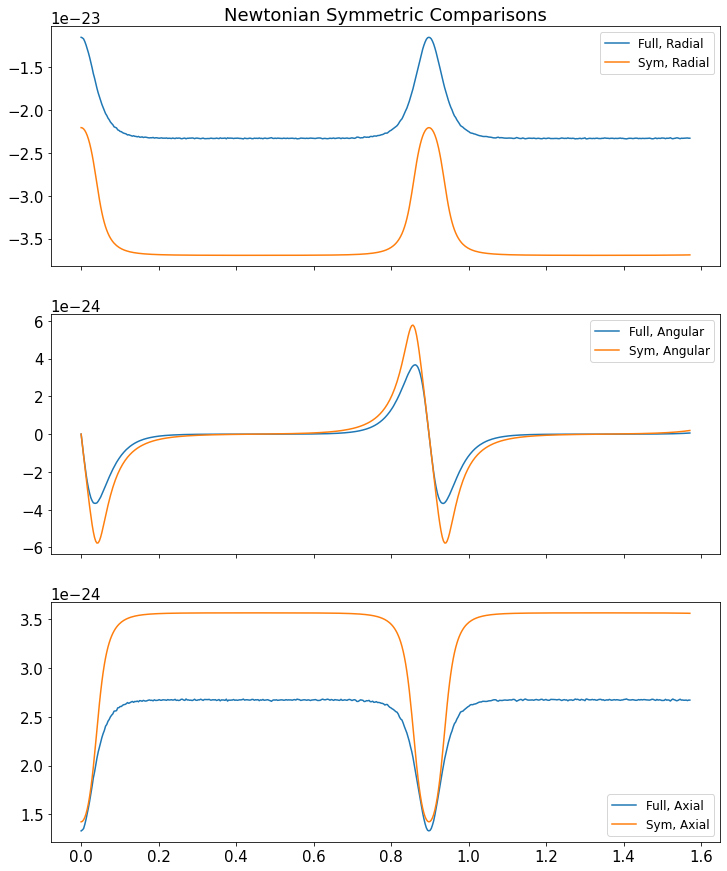

In [80]:
fig, ax = plt.subplots(3, figsize=(12,15), sharex=True)

ax[0].plot(test_phis, full_yuka[0], label='Full, Radial')
ax[0].plot(test_phis, sym_yuka[0], label='Sym, Radial')
ax[0].legend(fontsize=12)
ax[0].set_title('Newtonian Symmetric Comparisons', fontsize=18)

ax[1].plot(test_phis, full_yuka[1], label='Full, Angular')
ax[1].plot(test_phis, sym_yuka[1], label='Sym, Angular')
ax[1].legend(fontsize=12)

ax[2].plot(test_phis, full_yuka[2], label='Full, Axial')
ax[2].plot(test_phis, sym_yuka[2], label='Sym, Axial')
ax[2].legend(fontsize=12)

In [42]:
p = 7,2.5,40.0,20.0,5.0
full = holes_analysis(full_data, p)
sym = holes_analysis(sym_data, p)

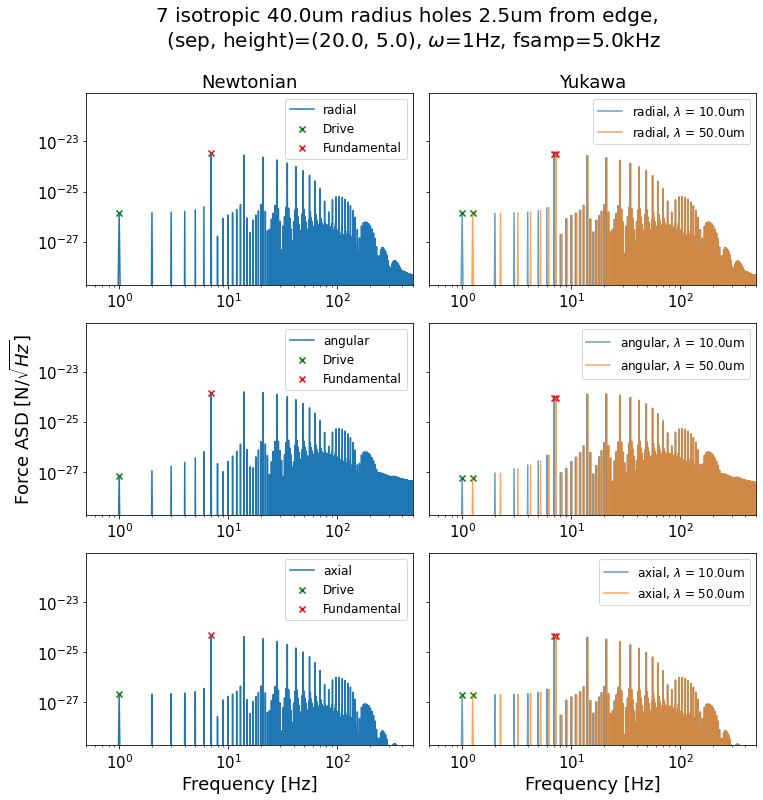

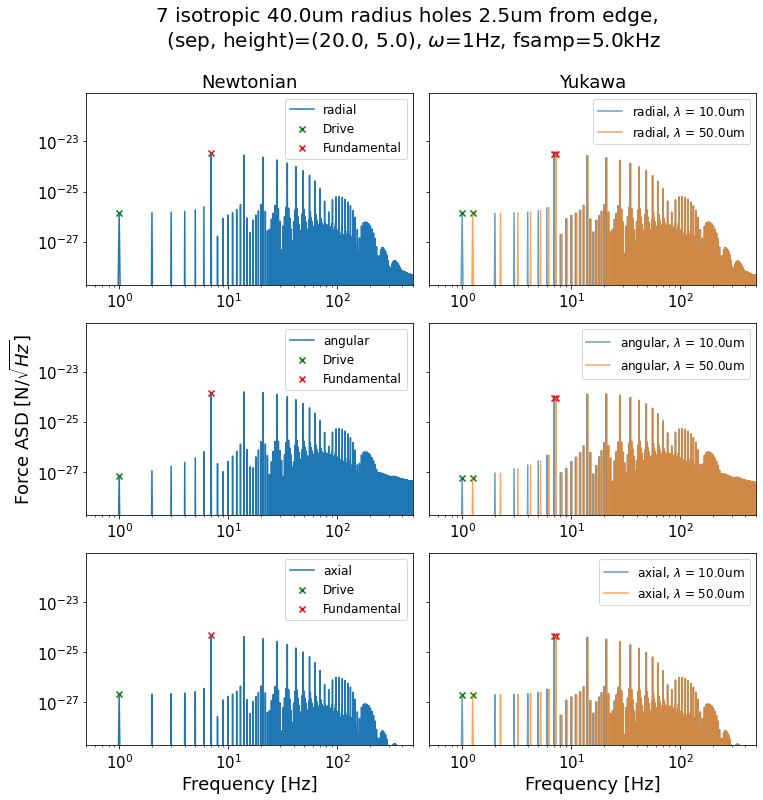

In [48]:
sym.plot_asd(w=1, tint=10, fsamp=5e3)

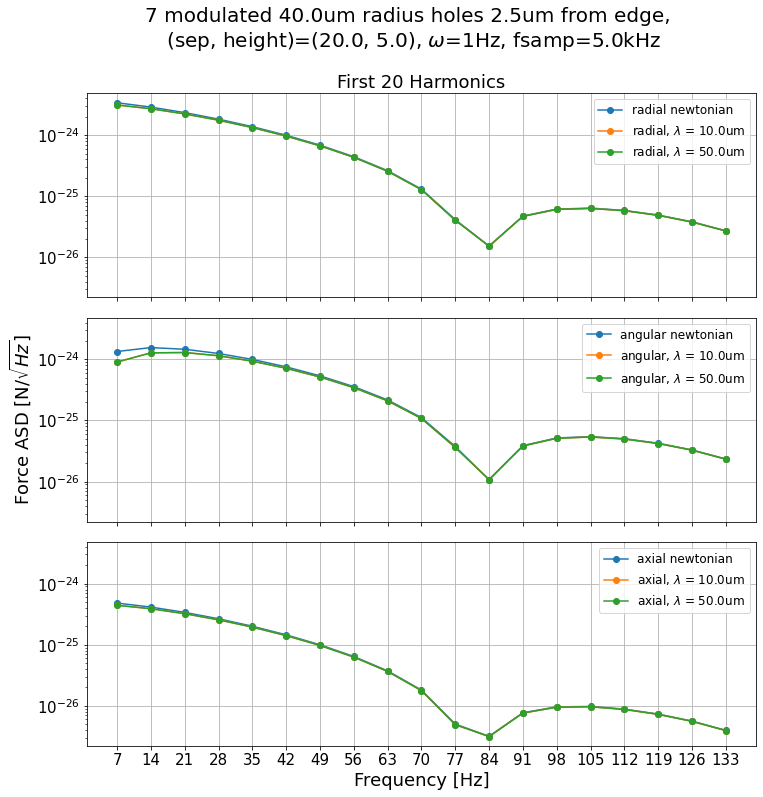

In [11]:
nonlin.plot_signals(w=1, tint=10, fsamp=5e3, num_harmonics=20, modulated=True)

In [49]:
x = full.sum_harmonics(num_harmonics=10, verbose=True)
y = sym.sum_harmonics(num_harmonics=10, verbose=True)

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 1.360e-23  8.709e-24   1.481e-24
Yukawa:
l=10.00um: 9.931e-25  2.365e-25   1.292e-25
l=50.00um: 1.002e-23  4.953e-24   1.133e-24

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 1.418e-23  8.476e-24   2.043e-24
Yukawa:
l=10.00um: 1.345e-23  7.340e-24   1.939e-24
l=50.00um: 1.345e-23  7.340e-24   1.939e-24



In [17]:
params = 7,2.5,5.0,20.0,5.0
ha3 = holes_analysis(data, params)
trial = data[7][2.5][5.0][20.0][5.0]

In [36]:
phis = data[7][2.5][5.0][20.0]['phis']
newt = trial['newtonian']
yuka = trial['yukawa']
nfunc = trial['newt_funcs']

In [26]:
newt.shape

(2000, 3)

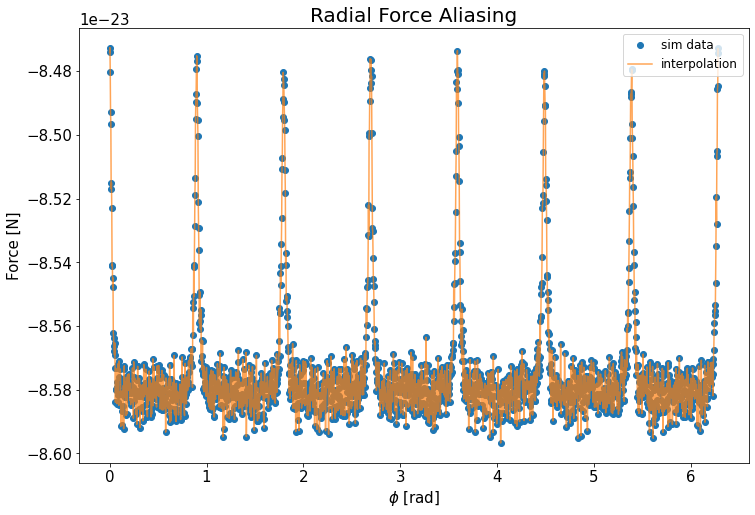

In [47]:
plt.plot(phis, newt[:,0], 'o', label='sim data')
plt.plot(phis, nfunc(phis)[0], alpha=0.7, label='interpolation')
plt.legend(fontsize=12)
plt.ylabel('Force [N]', fontsize=15)
plt.xlabel('$\phi$ [rad]', fontsize=15)
plt.title('Radial Force Aliasing', fontsize=20)
plt.show()

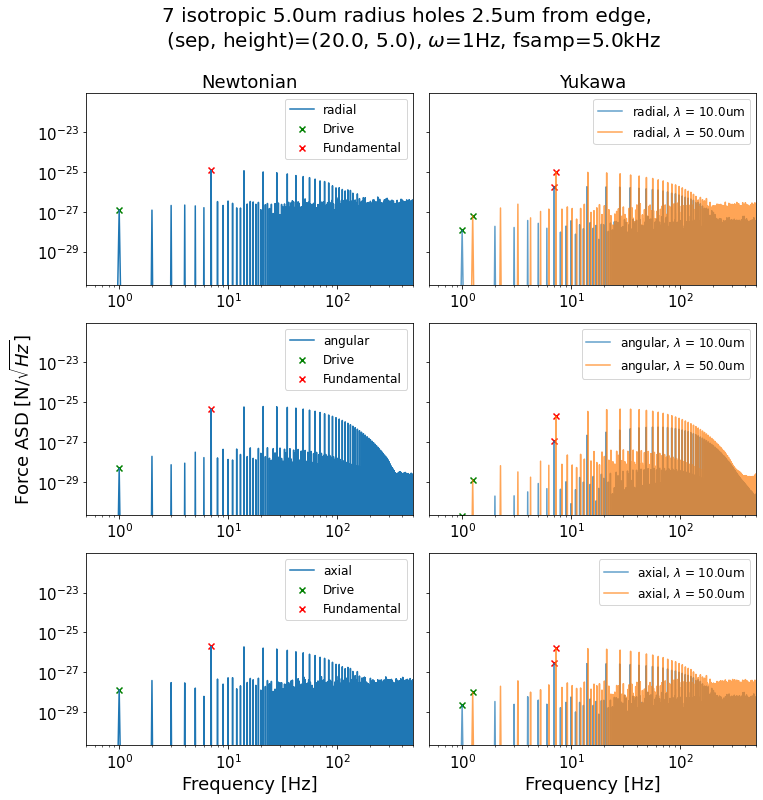

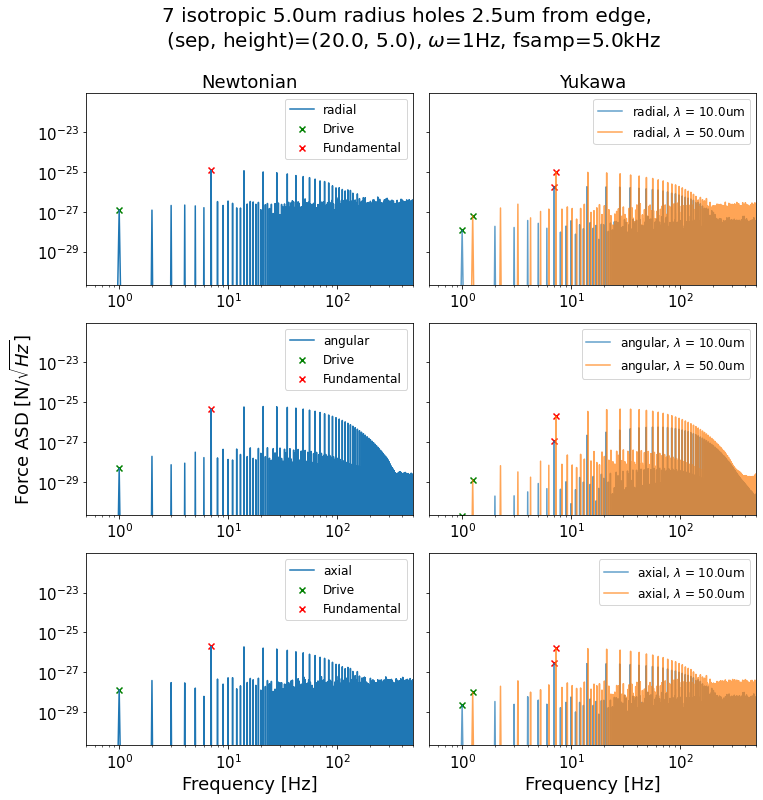

In [16]:
ha3.plot_asd()

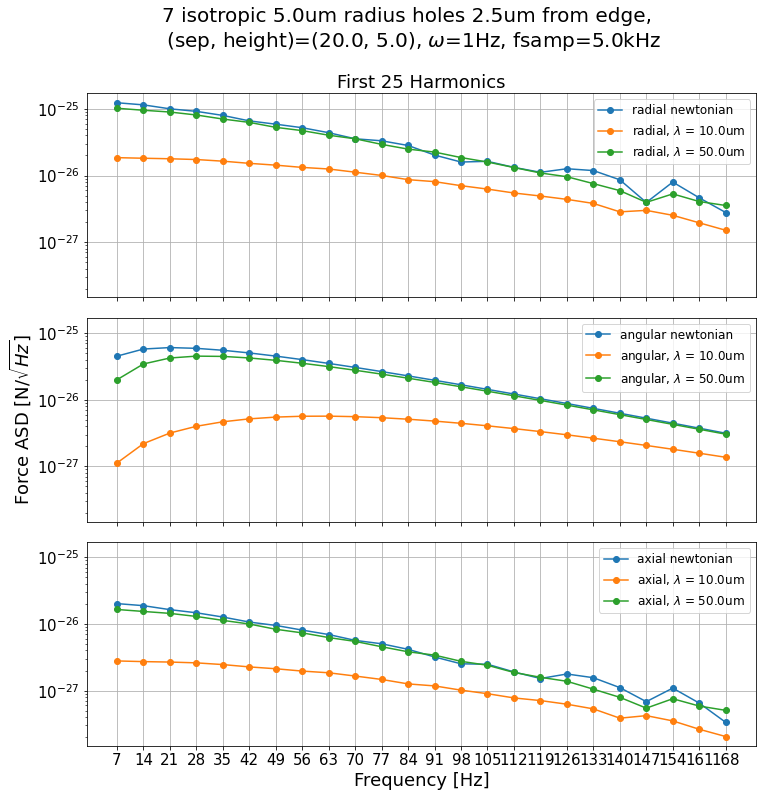

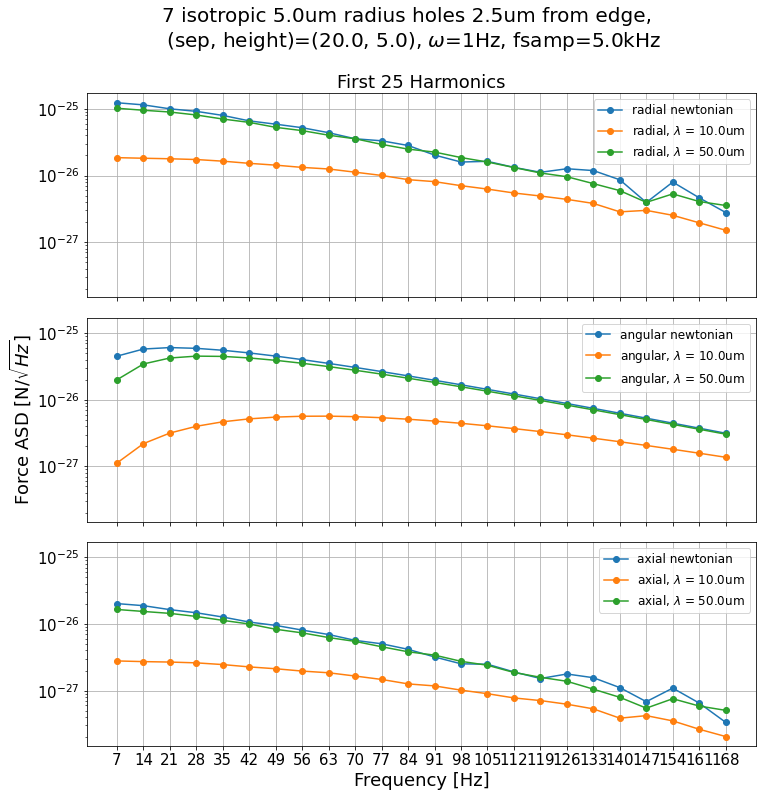

In [35]:
ha3.plot_signals(num_harmonics=25)

In [3]:
params = 7,2.5,12.5,20.0,5.0
ha2 = holes_analysis(data, params)

In [4]:
hsum = ha2.sum_harmonics(num_harmonics=10, verbose=True)
_ = ha2.sum_harmonics(num_harmonics=25, verbose=True)

First 10 harmonics:

           Radial     Angular     Axial
Newtonian: 3.322e-24  2.091e-24   4.649e-25
Yukawa:
l=10.00um: 4.559e-25  1.165e-25   6.237e-26
l=50.00um: 2.803e-24  1.465e-24   3.907e-25

First 25 harmonics:

           Radial     Angular     Axial
Newtonian: 3.959e-24  2.646e-24   5.526e-25
Yukawa:
l=10.00um: 6.517e-25  2.387e-25   8.882e-26
l=50.00um: 3.405e-24  1.976e-24   4.737e-25



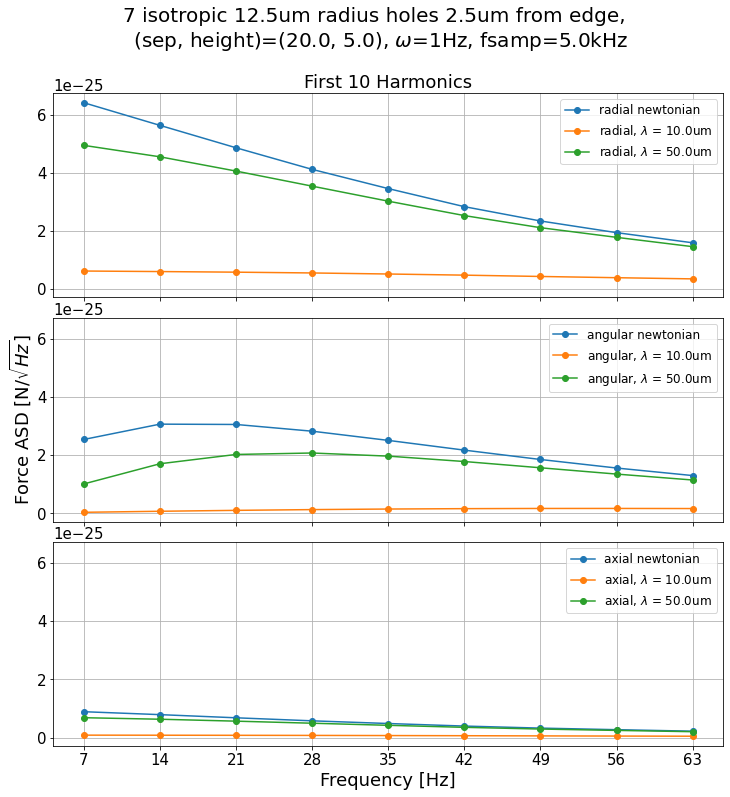

In [5]:
ha2.plot_signals(w=1, tint=10, fsamp=5e3)

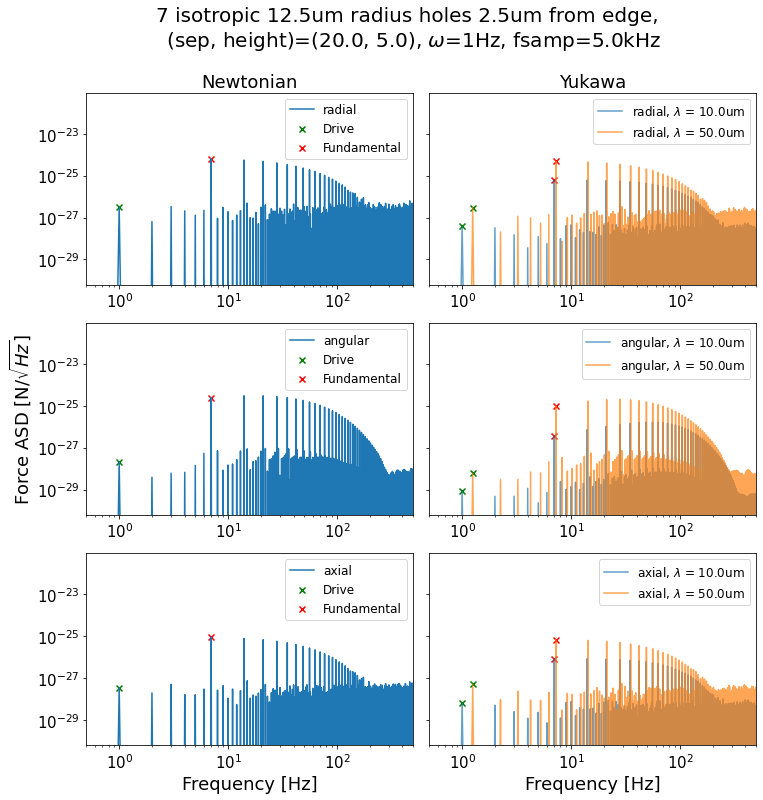

In [6]:
ha2.plot_asd()

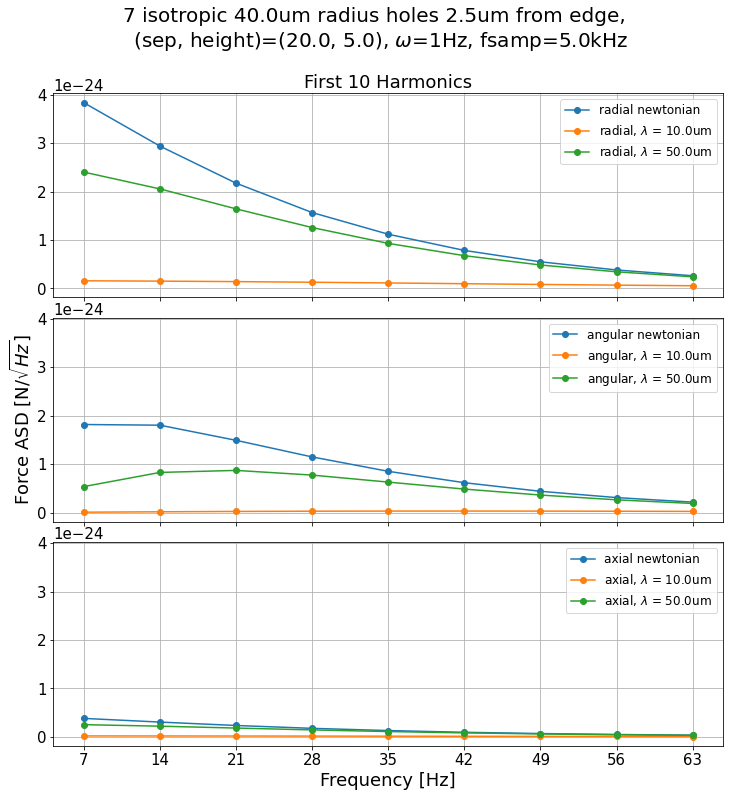

In [9]:
params = 7,2.5,40.0,20.0,5.0
ha1 = holes_analysis(data, params)
ha1.plot_signals(w=1, tint=10, fsamp=5e3)

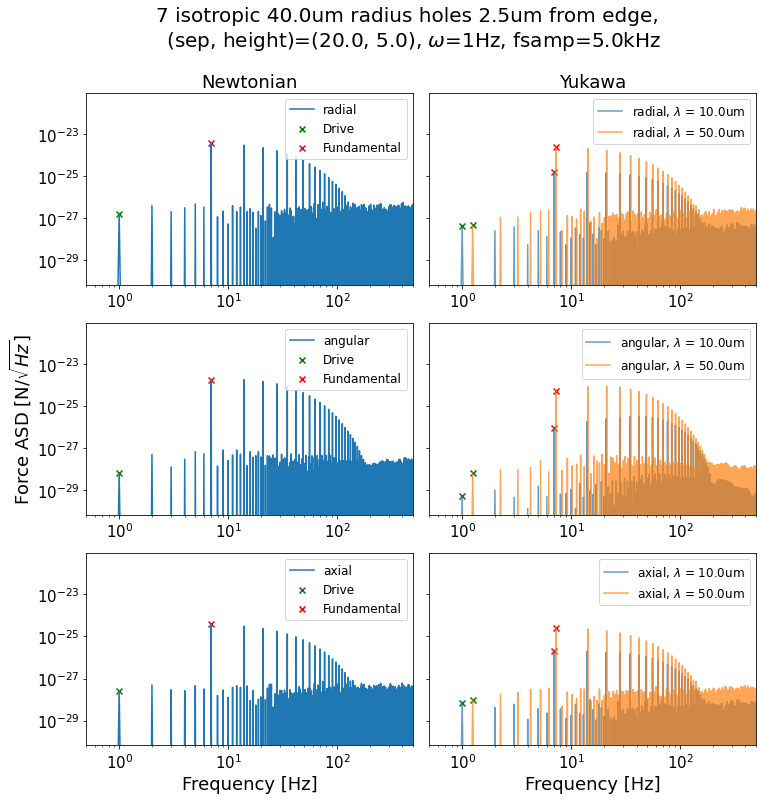

In [8]:
ha1.plot_asd(w=1, tint=10, fsamp=5e3)

In [4]:
data['order']

'[N][from_edge][hr][sep][height]'

In [5]:
trial = data[7][2.5][40.0]
sep = 20.0
height = 5.0

phis = trial[sep]['phis']
newt = trial[sep][height]['newtonian']
yuka = trial[sep][height]['yukawa']
lams = trial[sep][height]['lambdas']

newtf = trial[sep][height]['newt_funcs']
yukaf = trial[sep][height]['yuka_funcs']

In [6]:
lams

array([  1.00000000e-05,   5.00000000e-05])

In [7]:
phis_range = np.linspace(0, 2*np.pi, 500)
plt.plot(phis, newt[:,0], 'o')
plt.plot(phis_range, newtf(phis_range)[0])
plt.show()

plt.plot(phis, yuka[:,1,0], 'o')
plt.plot(phis_range, yukaf[1](phis_range)[0])
plt.show()

In [8]:
lams

array([  1.00000000e-05,   5.00000000e-05])

In [9]:
params = 7,2.5,40.0,20.0,5.0
ha1 = holes_analysis(data, params)

times, newtsamp, yukasamps = ha1.sample_Gdata(w=1, tint=10, fsamp=5e3)
yukasamp = yukasamps[0]
freqs, newtasd = ha1.asd(newtsamp, fsamp=5e3)
_, yukaasd0 = ha1.asd(yukasamp[0], fsamp=5e3)
_, yukaasd1 = ha1.asd(yukasamp[1], fsamp=5e3)

fig1, ax1 = plt.subplots(1,2, sharey=True)
ax1[0].plot(times, -newtsamp[0], label='newtonian')
ax1[1].plot(times, -yukasamp[0][0], label='yukawa $\lambda$=10um')
ax1[1].plot(times, -yukasamp[1][0], label='yukawa $\lambda$=50um')
ax1[0].set_xlim(-0.1,1.5)
ax1[1].set_xlim(-0.1,1.5)
ax1[0].legend(fontsize=12)
ax1[1].legend(fontsize=12)
fig1.suptitle('Radial Force Curves\n N=7, hr=40um, sep=20um, $\omega_{drive}$=1Hz, $f_{samp}$=5kHz', fontsize=20)
ax1[0].set_ylabel('Force [N]', fontsize=15)
ax1[0].set_xlabel('Time [s]', fontsize=15)
ax1[1].set_xlabel('Time [s]', fontsize=15)
plt.subplots_adjust(wspace=0.05)
plt.show()

fig2, ax2 = plt.subplots(1,2,sharey=True)

ax2[0].loglog(freqs, newtasd[0], label='newtonian')
ax2[1].loglog(freqs+0.5, yukaasd0[0], alpha=0.7, label='yukawa $\lambda$=10um,\n shifted by 0.5Hz')
ax2[1].loglog(freqs, yukaasd1[0], alpha=0.7, label='yukawa $\lambda$=50um')

ax2[0].scatter(1, newtasd[0][np.where(freqs==1)], color='g', marker='x', label='Drive')
ax2[0].scatter(7, newtasd[0][np.where(freqs==7)], color='r', marker='x', label='Fundamental')
ax2[1].scatter(1.5, yukaasd0[0][np.where(freqs==1)], color='g', marker='x', label='Drive')
ax2[1].scatter(7.5, yukaasd0[0][np.where(freqs==7)], color='r', marker='x', label='Fundamental')
ax2[1].scatter(1, yukaasd1[0][np.where(freqs==1)], color='g', marker='x')
ax2[1].scatter(7, yukaasd1[0][np.where(freqs==7)], color='r', marker='x')

for ax in ax2:
    ax.set_ylim(1e-28, 5e-23)
    ax.set_xlim(0.5, 500)
ax2[1].legend(fontsize=12)
fig2.suptitle('Radial ASD\n N=7, hr=40um, sep=20um, $\omega_{drive}$=1Hz, $f_{samp}$=5kHz', fontsize=20)
ax2[0].set_ylabel('Force ASD [N/$\sqrt{Hz}$]', fontsize=15)
ax2[0].set_xlabel('Frequency [Hz]', fontsize=15)
ax2[1].set_xlabel('Frequency [Hz]', fontsize=15)
plt.subplots_adjust(wspace=0.05)
plt.show()

inds, hfreqs, nsignals = ha1.signal_bins((freqs,newtasd[0]), N=7, w=1, num_harmonics=10)
_, _, ysignals0 = ha1.signal_bins((freqs,yukaasd0[0]), N=7, w=1, num_harmonics=10)
_, _, ysignals1 = ha1.signal_bins((freqs,yukaasd1[0]), N=7, w=1, num_harmonics=10)

plt.plot(hfreqs, nsignals, 'o', label='newtonain')
plt.plot(hfreqs, ysignals0, 'o', label='yukawa $\lambda$=10um')
plt.plot(hfreqs, ysignals1, 'o', label='yukawa $\lambda$=50um')
plt.xticks(hfreqs)
plt.xlabel('Frequency [Hz.]', fontsize=18)
plt.ylabel('Force ASD [N/$\sqrt{Hz}$]', fontsize=18)
plt.title('Signal Harmonics\n N=7, hr=40um, sep=20um, $\omega_{drive}$=1Hz, $f_{samp}$=5kHz', fontsize=20)
plt.legend(fontsize=12)
plt.show()

print('N=7, hr=40.0um, sep=20um statistics')
print(f'Newtonian 10-highest harmonics sum: {np.sum(nsignals):.2e} N/sqrt(Hz)')
print(f'Yuka 10um 10-highest harmonics sum: {np.sum(ysignals0):.2e} N/sqrt(Hz)')
print(f'Yuka 50um 10-highest harmonics sum: {np.sum(ysignals1):.2e} N/sqrt(Hz)')

N=7, hr=40.0um, sep=20um statistics
Newtonian 10-highest harmonics sum: 1.36e-23 N/sqrt(Hz)
Yuka 10um 10-highest harmonics sum: 9.93e-25 N/sqrt(Hz)
Yuka 50um 10-highest harmonics sum: 1.00e-23 N/sqrt(Hz)


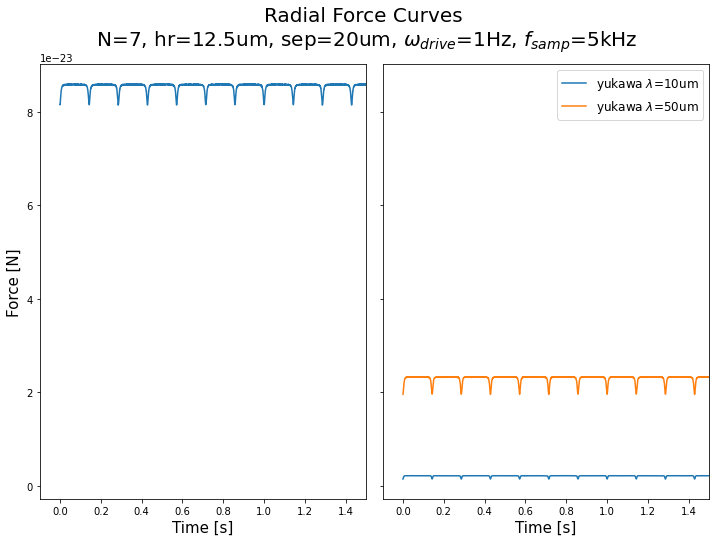

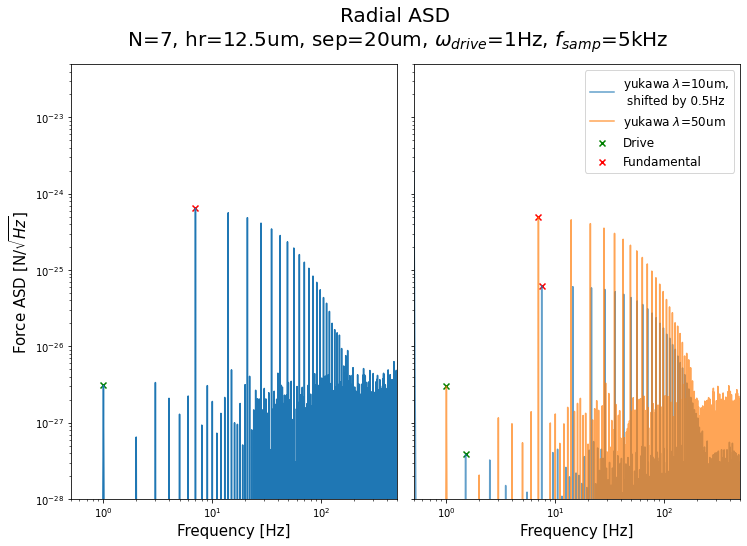

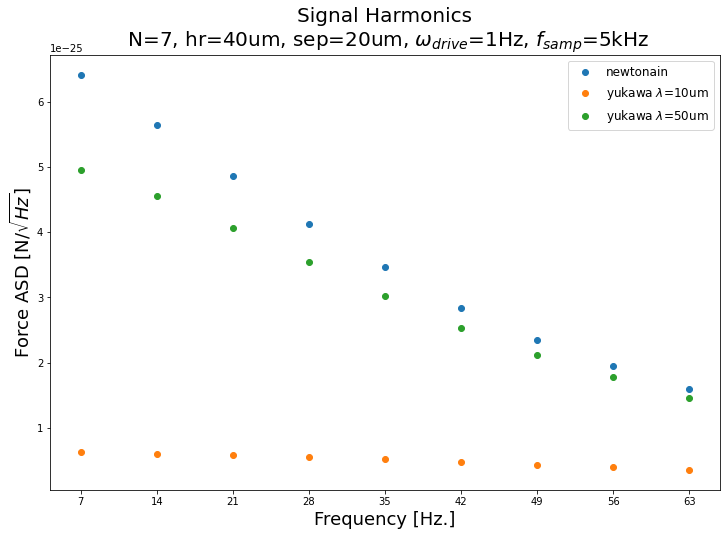

N=7, hr=12.5um, sep=20um statistics
Newtonian 10-highest harmonics sum: 3.32e-24 N/sqrt(Hz)
Yuka 10um 10-highest harmonics sum: 4.56e-25 N/sqrt(Hz)
Yuka 50um 10-highest harmonics sum: 2.80e-24 N/sqrt(Hz)


In [8]:
params = 7,2.5,12.5,20.0,5.0
ha2 = holes_analysis(data, params)

times, newtsamp, yukasamps = ha2.sample_Gdata(w=1, tint=10, fsamp=5e3)
yukasamp = yukasamps[0]
freqs, newtasd = ha2.asd(newtsamp, fsamp=5e3)
_, yukaasd0 = ha2.asd(yukasamp[0], fsamp=5e3)
_, yukaasd1 = ha2.asd(yukasamp[1], fsamp=5e3)

fig1, ax1 = plt.subplots(1,2, sharey=True)
ax1[0].plot(times, -newtsamp[0], label='newtonian')
ax1[1].plot(times, -yukasamp[0][0], label='yukawa $\lambda$=10um')
ax1[1].plot(times, -yukasamp[1][0], label='yukawa $\lambda$=50um')
ax1[0].set_xlim(-0.1,1.5)
ax1[1].set_xlim(-0.1,1.5)
ax1[1].legend(fontsize=12)
fig1.suptitle('Radial Force Curves\n N=7, hr=12.5um, sep=20um, $\omega_{drive}$=1Hz, $f_{samp}$=5kHz', fontsize=20)
ax1[0].set_ylabel('Force [N]', fontsize=15)
ax1[0].set_xlabel('Time [s]', fontsize=15)
ax1[1].set_xlabel('Time [s]', fontsize=15)
plt.subplots_adjust(wspace=0.05)
plt.show()

fig2, ax2 = plt.subplots(1,2,sharey=True)

ax2[0].loglog(freqs, newtasd[0], label='newtonian')
ax2[1].loglog(freqs+0.5, yukaasd0[0], alpha=0.7, label='yukawa $\lambda$=10um,\n shifted by 0.5Hz')
ax2[1].loglog(freqs, yukaasd1[0], alpha=0.7, label='yukawa $\lambda$=50um')

ax2[0].scatter(1, newtasd[0][np.where(freqs==1)], color='g', marker='x', label='Drive')
ax2[0].scatter(7, newtasd[0][np.where(freqs==7)], color='r', marker='x', label='Fundamental')
ax2[1].scatter(1.5, yukaasd0[0][np.where(freqs==1)], color='g', marker='x', label='Drive')
ax2[1].scatter(7.5, yukaasd0[0][np.where(freqs==7)], color='r', marker='x', label='Fundamental')
ax2[1].scatter(1, yukaasd1[0][np.where(freqs==1)], color='g', marker='x')
ax2[1].scatter(7, yukaasd1[0][np.where(freqs==7)], color='r', marker='x')

for ax in ax2:
    ax.set_ylim(1e-28, 5e-23)
    ax.set_xlim(0.5, 500)
ax2[1].legend(fontsize=12)
fig2.suptitle('Radial ASD\n N=7, hr=12.5um, sep=20um, $\omega_{drive}$=1Hz, $f_{samp}$=5kHz', fontsize=20)
ax2[0].set_ylabel('Force ASD [N/$\sqrt{Hz}$]', fontsize=15)
ax2[0].set_xlabel('Frequency [Hz]', fontsize=15)
ax2[1].set_xlabel('Frequency [Hz]', fontsize=15)
plt.subplots_adjust(wspace=0.05)
plt.show()

inds, hfreqs, nsignals = ha2.signal_bins((freqs,newtasd[0]), N=7, w=1, num_harmonics=10)
_, _, ysignals0 = ha2.signal_bins((freqs,yukaasd0[0]), N=7, w=1, num_harmonics=10)
_, _, ysignals1 = ha2.signal_bins((freqs,yukaasd1[0]), N=7, w=1, num_harmonics=10)

plt.plot(hfreqs, nsignals, 'o', label='newtonain')
plt.plot(hfreqs, ysignals0, 'o', label='yukawa $\lambda$=10um')
plt.plot(hfreqs, ysignals1, 'o', label='yukawa $\lambda$=50um')
plt.xticks(hfreqs)
plt.xlabel('Frequency [Hz.]', fontsize=18)
plt.ylabel('Force ASD [N/$\sqrt{Hz}$]', fontsize=18)
plt.title('Signal Harmonics\n N=7, hr=40um, sep=20um, $\omega_{drive}$=1Hz, $f_{samp}$=5kHz', fontsize=20)
plt.legend(fontsize=12)
plt.show()

print('N=7, hr=12.5um, sep=20um statistics')
print(f'Newtonian 10-highest harmonics sum: {np.sum(nsignals):.2e} N/sqrt(Hz)')
print(f'Yuka 10um 10-highest harmonics sum: {np.sum(ysignals0):.2e} N/sqrt(Hz)')
print(f'Yuka 50um 10-highest harmonics sum: {np.sum(ysignals1):.2e} N/sqrt(Hz)')

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


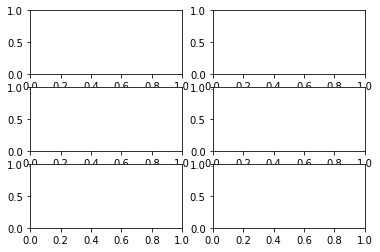

In [12]:
fig,axs = plt.subplots(3,2)
for ax in axs:
    for a in ax:
        print(type(a))